In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ds = pd.read_csv('Diversity.csv',encoding='latin1')
pr = pd.read_csv('Poverty rate.csv', encoding='latin1') # using encoding to solve the error: 'utf-8' codec can't decode. 
pk = pd.read_csv('Police Killings.csv',encoding='latin1')
mi = pd.read_csv('Median income.csv',encoding='latin1')
hs = pd.read_csv('HS.csv',encoding='latin1')

In [419]:
ds.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [3]:
ds=ds.rename(columns={"Geographic area":"Geographic Area"})

In [421]:
pr.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [422]:
pk.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [4]:
# change state to Geographic Area and change city to City to match with other tables.
pk = pk.rename(columns={"state":"Geographic Area"})
pk = pk.rename(columns={"city":"City"})

In [425]:
mi.head()

,Geographic Area,City,Median Income
0,AZ,Stanfield CDP,4511
1,CA,Delft Colony CDP,6917
2,ND,Conway city,7083
3,AZ,Lower Santan Village CDP,7175
4,VA,Union Level CDP,8015


In [426]:
hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [5]:
print(len(ds))
print(len(mi))
print(len(pr))
print(len(hs))

29268
27385
29329
29329


In [428]:
# merge pr, mi, and hs

In [5]:
hs = hs.merge(pr, how="left", on=["Geographic Area", "City"])
hs = hs.merge(mi, how="left", on=["Geographic Area", "City"])
hs = hs.merge(ds, how="left", on=["Geographic Area", "City"])

In [526]:
hs.head()

,Geographic Area,City,percent_completed_hs,poverty_rate,Median Income,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,21.2,0.788,11207.0,0.672,0.302,0,0,0.016
1,AL,Abbeville city,69.1,0.291,25615.0,0.544,0.414,0.001,0.01,0.031
2,AL,Adamsville city,78.9,0.255,42575.0,0.523,0.449,0.005,0.003,0.023
3,AL,Addison town,81.4,0.307,37083.0,0.991,0.001,0,0.001,0.004
4,AL,Akron town,68.6,0.42,21667.0,0.132,0.865,0,0,0.003


In [7]:
hs.isnull().sum()

Geographic Area             0
City                        0
percent_completed_hs        0
poverty_rate                0
Median Income            1946
share_white               207
share_black               207
share_native_american     207
share_asian               207
share_hispanic            207
dtype: int64

In [6]:
# for convenience, i will just drop the null values
hs = hs.dropna()

In [9]:
hs.isnull().sum()

Geographic Area          0
City                     0
percent_completed_hs     0
poverty_rate             0
Median Income            0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

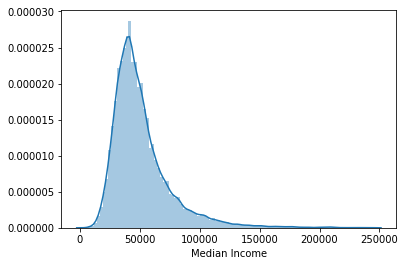

In [537]:
# the median income in the US is about 50,000. This is pretty close to the number from the internet-$53,657
sns.distplot(hs['Median Income'], bins=100)

/Users/michaelzeng/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/michaelzeng/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/michaelzeng/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)


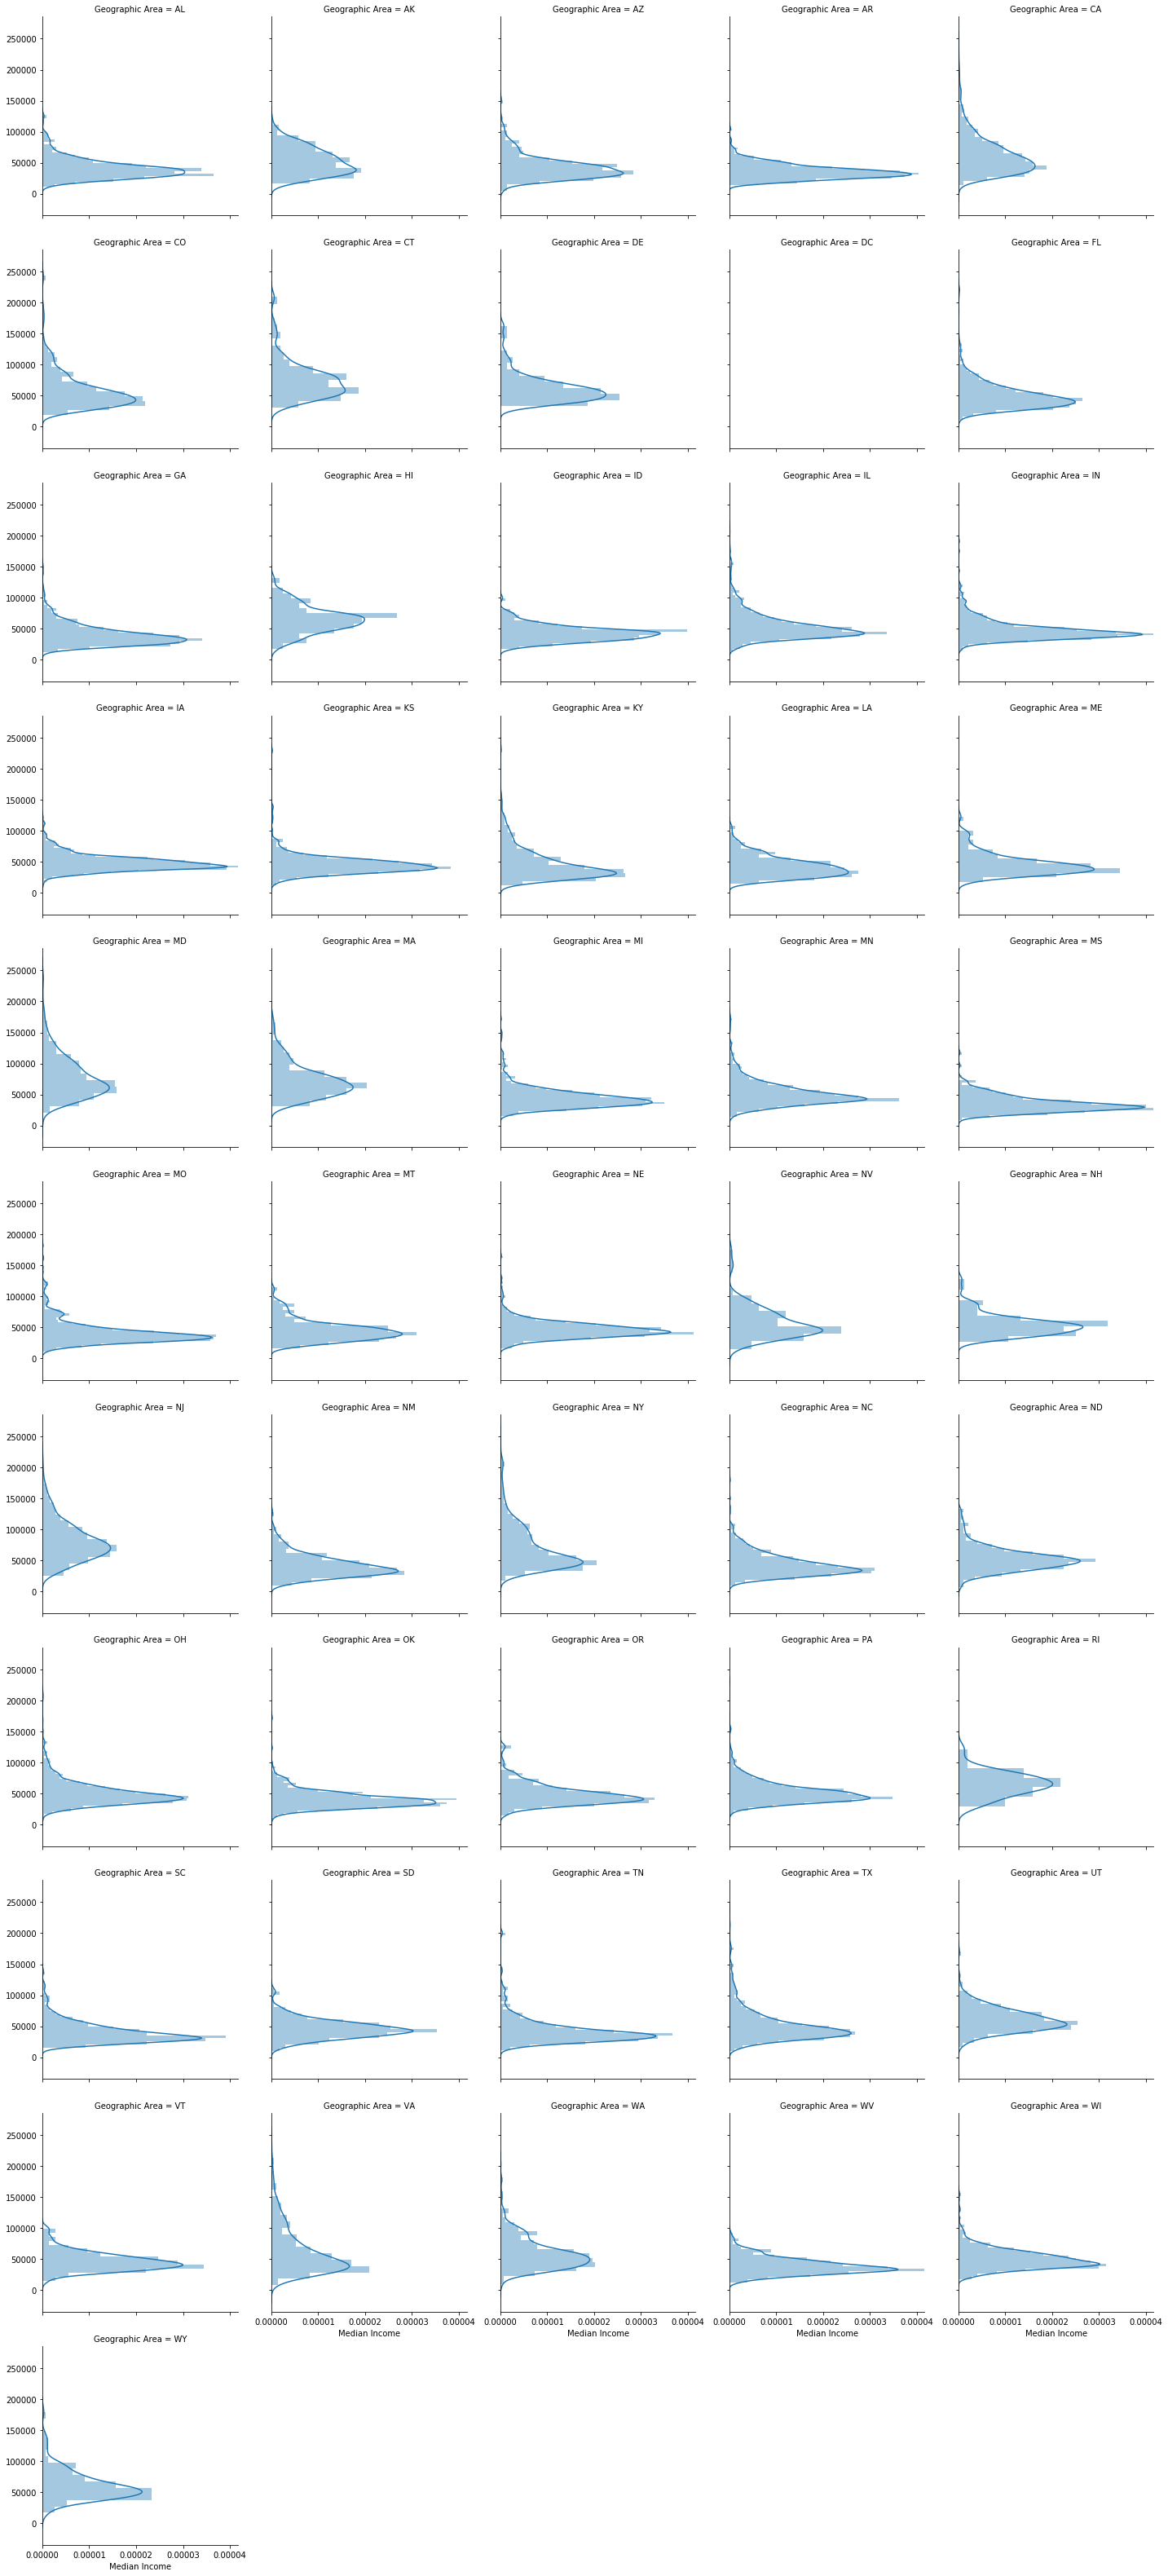

In [502]:
grid = sns.FacetGrid(hs, col="Geographic Area", col_wrap=5, size=4)
grid.map(sns.distplot, "Median Income", vertical=True)

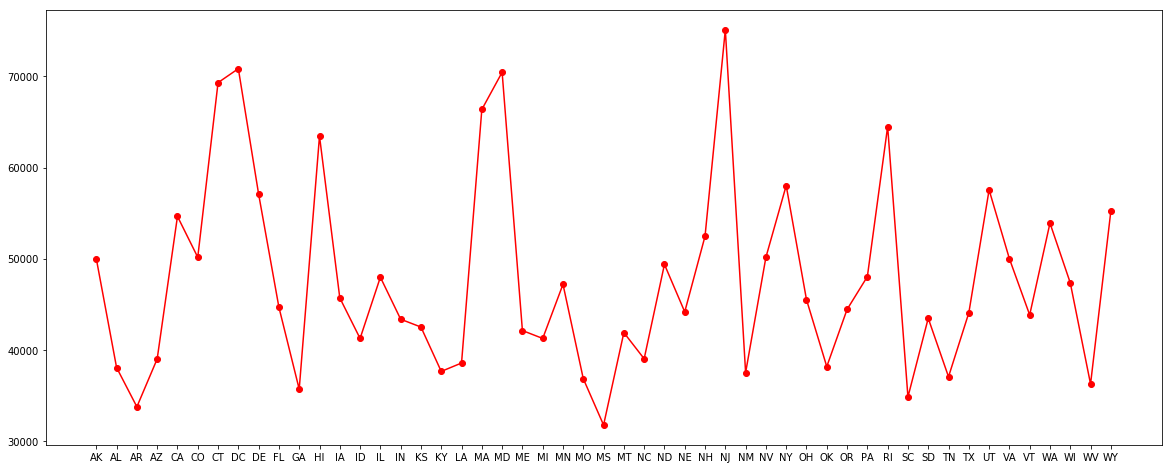

In [32]:
# show the median income in each state
# NJ has the highest median income, MS has the lowest.
all_median_income = hs.groupby('Geographic Area')["Median Income"].median()
plt.figure(figsize=(20,8))
plt.plot(all_median_income , marker='o', color='red')


In [8]:
# convert str to float
hs['poverty_rate']=[float(x) for x in hs['poverty_rate']]

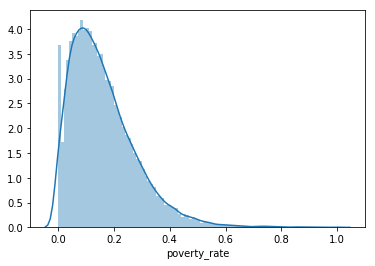

In [34]:
# the poverty rate in the US is 14.8%. So this is about the same
sns.distplot(hs['poverty_rate'], bins=100)

/Users/michaelzeng/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/michaelzeng/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/michaelzeng/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)


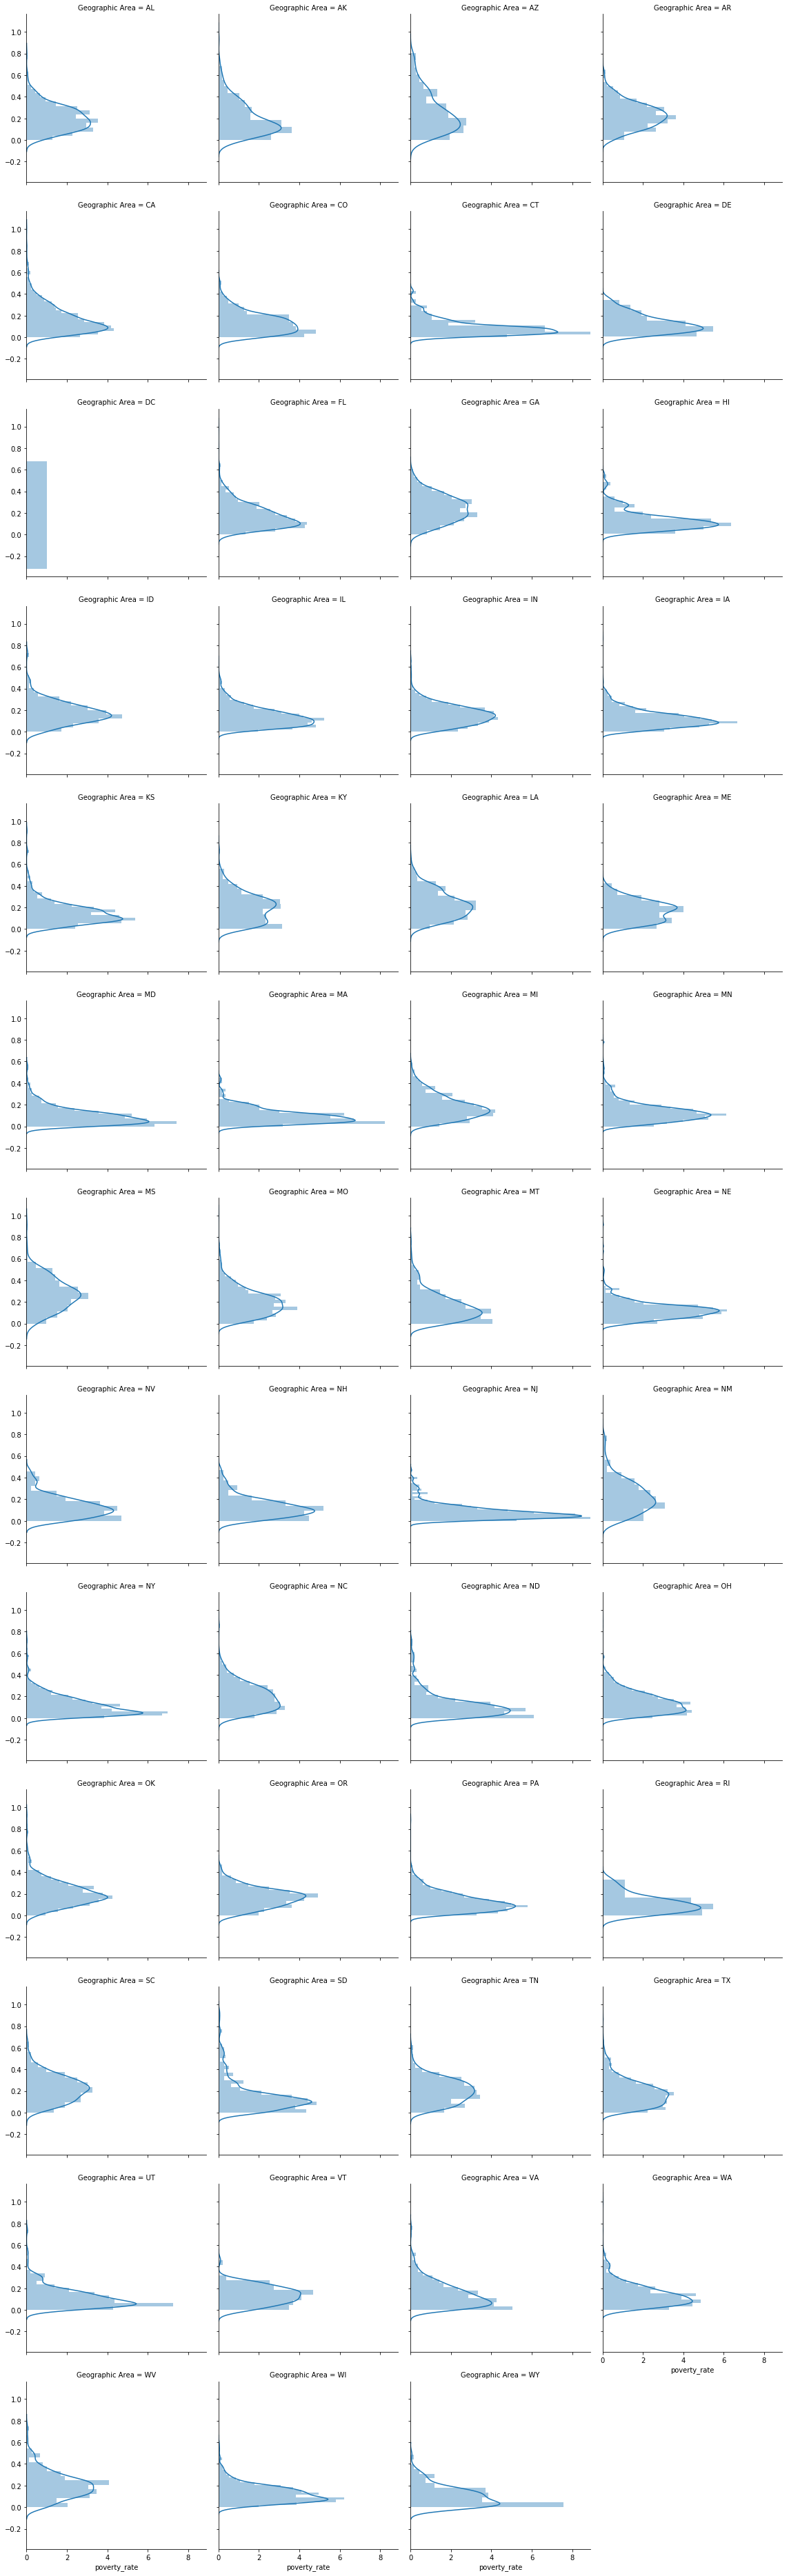

In [53]:
grid = sns.FacetGrid(hs, col="Geographic Area", col_wrap=4, size=4)
grid.map(sns.distplot, 'poverty_rate', vertical=True)

In [250]:
all_poverty_rate = hs.groupby('Geographic Area')["poverty_rate"].mean()
all_poverty_rate.head()

Geographic Area
AK    0.201561
AL    0.203568
AR    0.230961
AZ    0.251437
CA    0.167686
Name: poverty_rate, dtype: float64

In [251]:
# show the average poverty rate in each state
all_poverty_rate = hs.groupby('Geographic Area')["poverty_rate"].mean().reset_index()
all_poverty_rate.sort_values(by='poverty_rate', inplace=True, ascending=False)
all_poverty_rate.rename(columns={'Geographic Area':'Geographic_Area'}, inplace=True)


In [252]:
all_poverty_rate

,Geographic_Area,poverty_rate
25,MS,0.271850
3,AZ,0.251437
10,GA,0.240146
2,AR,0.230961
32,NM,0.228502
18,LA,0.224343
40,SC,0.223412
1,AL,0.203568
36,OK,0.202982
49,WV,0.202395


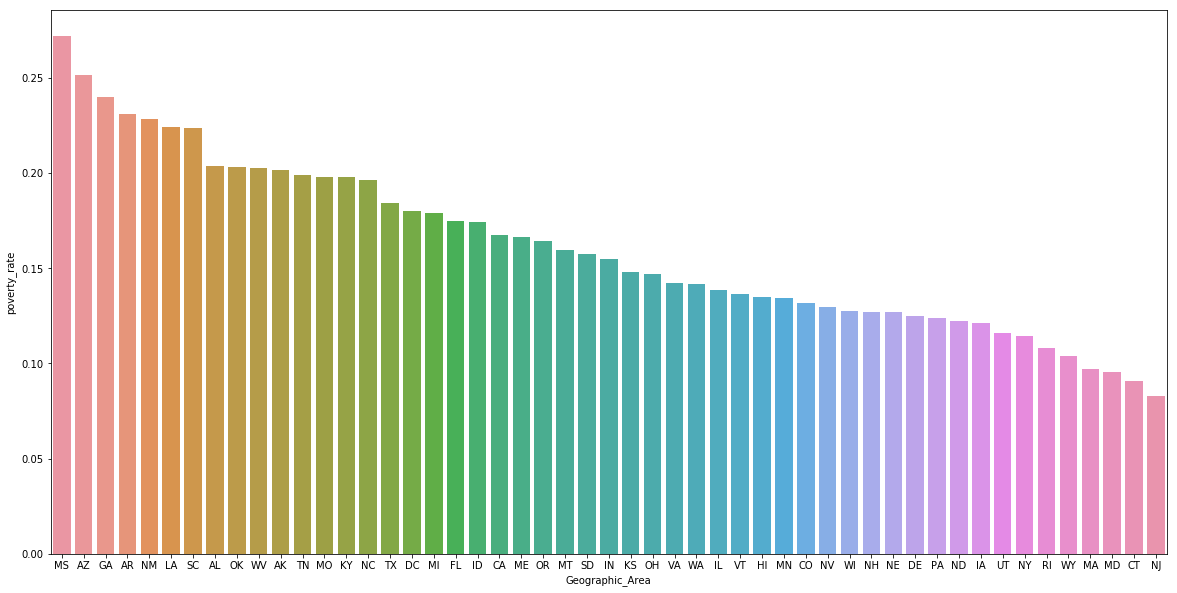

In [210]:
plt.figure(figsize=(20,10))
sns.barplot('Geographic_Area', 'poverty_rate', data=all_poverty_rate)

In [253]:
# use unsorted values to show the affect of color ranking - the one with the highest ranking has the darkest color
all_poverty_rate2 = hs.groupby('Geographic Area')["poverty_rate"].mean().reset_index()

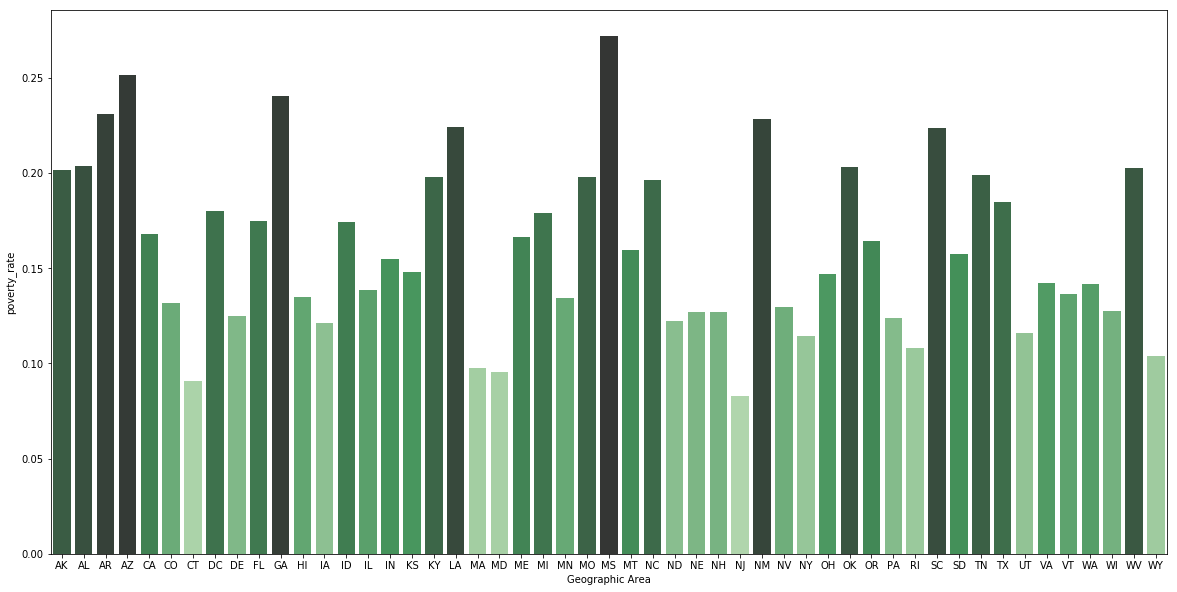

In [258]:
plt.figure(figsize=(20,10))
pal = sns.color_palette("Greens_d", len(all_poverty_rate2))
rank = all_poverty_rate2["poverty_rate"].argsort().argsort() # need to use argsort 2 times to get this affect
g = sns.barplot(x='Geographic Area',y='poverty_rate', data=all_poverty_rate2, palette=np.array(pal[::-1])[rank])

In [259]:
p = 0.01
p_values = []

for x in range(1,len(all_poverty_rate)+1):
    p_values.append(round(p*x,2))

all_poverty_rate['p_values']=p_values

In [260]:
all_poverty_rate.head()

,Geographic_Area,poverty_rate,p_values
25,MS,0.271850,0.01
3,AZ,0.251437,0.02
10,GA,0.240146,0.03
2,AR,0.230961,0.04
32,NM,0.228502,0.05


In [281]:
plt.figure(figsize=(20,10))
pal = sns.color_palette("Greens_d", len(all_poverty_rate))
rank = all_poverty_rate["poverty_rate"].argsort()
g = sns.barplot(x='Geographic_Area',y='poverty_rate', data=all_poverty_rate, palette=np.array(pal[::-1])[rank])

for index, row in all_poverty_rate.iterrows():
    g.text(row.Geographic_Area,row.p_values, row.poverty_rate, color='black', ha="center")
plt.show()

AttributeError: 'NoneType' object has no attribute 'seq'